In [1]:
#Start by configuring a spark session 
from pyspark import SparkConf, SparkContext
import collections
from pyspark.sql import SparkSession

In [2]:
#spark session and data input
conf=SparkConf().setMaster("local").setAppName("News Article Word Count") # data set news articles
sc=SparkContext(conf=conf)
spark = SparkSession.builder.appName("News Article Word Count").master("local[*]").getOrCreate()
lines=sc.textFile("C:/Users/shani/Documents/Data Science Masters/Big Data/Individual Assignment/abcnews-date-text.csv")
print(lines.count())

1048576


In [3]:
# Retrieve the number of CPU cores for determining RDD partition 
num_cores = spark.sparkContext.defaultParallelism

# Print the number of CPU cores
print("Number of CPU cores:", num_cores)

# I will select the RDD partition using 2-4 times the amount of this CPU (2-4 partitions)

Number of CPU cores: 1


In [4]:
#remove the dates from the data set
headlines = lines.map(lambda line: line.split(',')[1]) #return rdd with just the headlines of the data
headlines.collect()

['headline_text',
 'aba decides against community broadcasting licence',
 'act fire witnesses must be aware of defamation',
 'a g calls for infrastructure protection summit',
 'air nz staff in aust strike for pay rise',
 'air nz strike to affect australian travellers',
 'ambitious olsson wins triple jump',
 'antic delighted with record breaking barca',
 'aussie qualifier stosur wastes four memphis match',
 'aust addresses un security council over iraq',
 'australia is locked into war timetable opp',
 'australia to contribute 10 million in aid to iraq',
 'barca take record as robson celebrates birthday in',
 'bathhouse plans move ahead',
 'big hopes for launceston cycling championship',
 'big plan to boost paroo water supplies',
 'blizzard buries united states in bills',
 'brigadier dismisses reports troops harassed in',
 'british combat troops arriving daily in kuwait',
 'bryant leads lakers to double overtime win',
 'bushfire victims urged to see centrelink',
 'businesses should prepa

In [5]:
#remove the headline title 
headlines=headlines.filter(lambda x: x !='headline_text')
headlines.first()

'aba decides against community broadcasting licence'

In [6]:
#partition the RDD into 4 partitions (2 and 3 partitions were tested also and 4 was determined as the optimal
# partition choice in terms of processing time)
headlines.repartition(4)
print('Number of rows =',headlines.count())

Number of rows = 1048575


In [7]:
#Apply map reduce algorithm to partitioned RDD
headlines_word_count = (headlines.flatMap(lambda x: x.split())# Split headlines into a list of singular words
				 .map(lambda word: (word, 1))  # Map each word to a key value/create key value pair
                 .reduceByKey(lambda a, b: a + b))  # Aggregate words by key to obtain word count

In [8]:
#View result
for word,count in headlines_word_count.collect():
    print(word,count)

decides 131
against 9878
community 4261
broadcasting 46
act 5581
fire 13296
must 1568
of 74412
defamation 287
g 866
calls 7985
protection 1510
summit 1021
staff 2544
in 127180
pay 4622
jump 610
antic 3
delighted 92
record 4985
barca 339
aussie 3194
four 3559
match 1995
addresses 276
security 3918
iraq 5697
australia 10785
is 6385
into 10213
timetable 160
10 1917
take 5064
as 18887
celebrates 1061
bathhouse 21
move 2936
launceston 634
cycling 503
championship 484
plan 11981
water 11657
supplies 417
blizzard 52
united 1670
brigadier 22
arriving 40
bryant 85
lakers 67
win 7883
urged 7769
businesses 1105
prepare 1152
avenges 6
defeat 776
eliminate 53
massu 10
call 8980
fuel 2172
go 4133
carews 1
freak 135
goal 452
leaves 1924
out 16308
bank 2536
cuts 4124
home 7307
rates 3016
help 6452
chief 4029
executive 478
fails 1595
position 411
councillor 1207
contest 593
moves 2195
heritage 1336
garden 307
welcomes 2473
ambulance 1129
decision 3868
insurance 853
breakthrough 567
crean 360
tells 1792

In [9]:
#filter for any occurrences of the shocking words and print word count
shocking_words=['kill','murder','attack','dead','death','accident','stabbed','stabbing','assault',
                'assaulting','assaulted','killed','killing','manslaughter','fire','kidnap','kidnapping',
                'kidnapped','torture','torturing','tortured','shot','shooting','exploded','explosion']
ShockingWords = headlines_word_count.filter(lambda x :any(word in x[0] for word in shocking_words))
for word,count in ShockingWords.collect():
    print(word,count)

#The result conveys some unrelated words such as 'snapshot', 'deadline and 'firebug'

fire 13296
accidental 128
murder 8616
killed 7789
kills 2700
killing 1296
murderer 471
murdered 502
kill 1969
deadly 1168
fires 2251
explosion 939
firefighter 294
accidents 352
shootings 241
manslaughter 646
deadline 930
murdering 365
stabbings 134
assaults 509
attacking 148
misfire 5
counterattack 3
fireweed 39
killafaddy 6
painkillers 24
killjoys 1
firebirds 144
deadlocked 46
slingshot 20
backfire 21
accidentally 92
murderers 73
snapshot 92
tortures 1
housefire 18
torturing 42
counterattacks 2
slingshots 5
fireproof 3
shotgun 62
firemen 16
kidnappings 13
fireballs 6
deadlys 8
fireman 15
misfires 10
unexploded 27
firework 23
backfires 30
deadlier 4
firebombed 19
firebombings 3
firebugs 26
deadlines 14
firecracker 9
hellfire 7
fireblight 8
hotshot 2
bonfire 20
killeen 5
backfired 6
wildfires 38
zeffirelli 1
grassfire 94
torturer 12
mackillop 69
murderous 5
oakeshott 141
firefox 3
shotlining 1
oakeshotts 4
fireking 1
firemens 1
rivskills 6
backstabbing 4
riverfire 7
fireflies 2
fireies 

Filter and view for the horrible shocking words 

In [10]:
#filter for the distinct occurrences of the shocking words 
shocking_words=['kill','murder','attack','dead','death','accident','stabbed','stabbing','assault',
                'assaulting','assaulted','killed','killing','manslaughter','fire','kidnap','kidnapping',
                'kidnapped','torture','torturing','tortured','shot','shooting','exploded','explosion']
ShockingWords = headlines_word_count.filter(lambda x: x[0] in shocking_words)
for word,count in ShockingWords.collect():
    print(word,count)


fire 13296
murder 8616
killed 7789
killing 1296
kill 1969
explosion 939
manslaughter 646
torturing 42
exploded 12
death 10475
attack 6538
dead 5581
accident 2683
stabbing 2575
stabbed 901
assault 4161
shooting 3301
kidnap 246
shot 2083
assaulting 429
tortured 73
assaulted 521
torture 444
kidnapping 263
kidnapped 375


In [11]:
#view output in descending order
ShockingWords.sortBy(lambda x: x[1], ascending=False).collect()

[('fire', 13296),
 ('death', 10475),
 ('murder', 8616),
 ('killed', 7789),
 ('attack', 6538),
 ('dead', 5581),
 ('assault', 4161),
 ('shooting', 3301),
 ('accident', 2683),
 ('stabbing', 2575),
 ('shot', 2083),
 ('kill', 1969),
 ('killing', 1296),
 ('explosion', 939),
 ('stabbed', 901),
 ('manslaughter', 646),
 ('assaulted', 521),
 ('torture', 444),
 ('assaulting', 429),
 ('kidnapped', 375),
 ('kidnapping', 263),
 ('kidnap', 246),
 ('tortured', 73),
 ('torturing', 42),
 ('exploded', 12)]

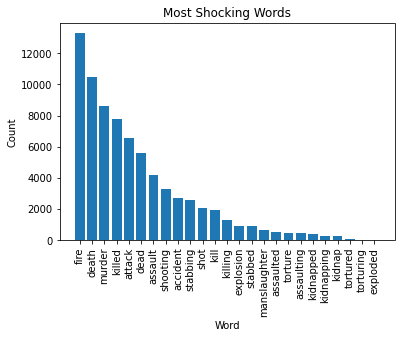

In [13]:
# Visualise  shocking words count
import matplotlib.pyplot as plt

#put words in descending order
sorted_words= ShockingWords.sortBy(lambda x: x[1], ascending=False).collect()
words = [word for word, count in sorted_words]
counts = [count for word, count in sorted_words]

# Create bar chart
plt.bar(words, counts)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Shocking Words')
plt.xticks(rotation=90)
plt.show()

Filter and view for the funny shocking words

In [14]:
#filter for any instances of the funny words and print result
funny_words=['bamboozled','bamboozle','bamboozled','clown','clowns','flabbergasted','monkey']
FunnyWords = headlines_word_count.filter(lambda x : any(word in x[0] for word in funny_words))
for word,count in FunnyWords.collect():
    print(word,count)

#the result also conveys irrelevant words such as 'clownfish' and 'surveymonkey'

monkeypox 2
clowning 1
rodeoclown 1
clowns' 1
'flabbergasted' 1
surveymonkey 2
monkey 139
monkeys 49
bamboozles 3
clown 25
flabbergasted 3
clowns 21
bamboozled 3
bamboozle 1
clownfish 3
clowney 1
beclowning 1


In [15]:
#filter for the distinct occurrences of the funny words and print result
funny_words=['bamboozled','bamboozle','bamboozled','clown','clowns','flabbergasted','monkey']
FunnyWords = headlines_word_count.filter(lambda x: x[0] in funny_words)
for word,count in FunnyWords.collect():
    print(word,count)

monkey 139
clown 25
flabbergasted 3
clowns 21
bamboozled 3
bamboozle 1


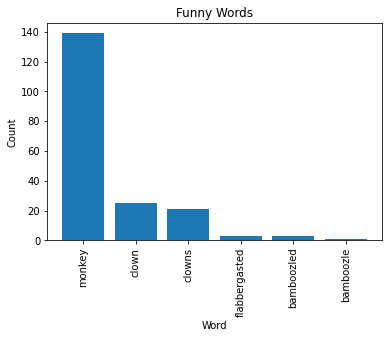

In [16]:
# Visualise funny words count
import matplotlib.pyplot as plt

#put words in descending order 
sorted_funny_words= FunnyWords.sortBy(lambda x: x[1], ascending=False).collect()
words = [word for word, count in sorted_funny_words]
counts = [count for word, count in sorted_funny_words]

# Create bar chart
plt.bar(words, counts)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Funny Words')
plt.xticks(rotation=90)
plt.show()

In [17]:
#create RDD of the full headlines
full_headlines=headlines = lines.map(lambda line: line.split(',')[1]) #return rdd with just the headlines of the data
full_headlines.collect()

['headline_text',
 'aba decides against community broadcasting licence',
 'act fire witnesses must be aware of defamation',
 'a g calls for infrastructure protection summit',
 'air nz staff in aust strike for pay rise',
 'air nz strike to affect australian travellers',
 'ambitious olsson wins triple jump',
 'antic delighted with record breaking barca',
 'aussie qualifier stosur wastes four memphis match',
 'aust addresses un security council over iraq',
 'australia is locked into war timetable opp',
 'australia to contribute 10 million in aid to iraq',
 'barca take record as robson celebrates birthday in',
 'bathhouse plans move ahead',
 'big hopes for launceston cycling championship',
 'big plan to boost paroo water supplies',
 'blizzard buries united states in bills',
 'brigadier dismisses reports troops harassed in',
 'british combat troops arriving daily in kuwait',
 'bryant leads lakers to double overtime win',
 'bushfire victims urged to see centrelink',
 'businesses should prepa

In [18]:
#Funny headlines

#filter for the headlines to return the headlines containing all the funny word occurrences 
funny_words=['bamboozled','bamboozle','bamboozled','clown','clowns','flabbergasted','monkey']
Funny_headlines = full_headlines.filter(lambda x: any(word in x for word in funny_words))
Funny_headlines.collect()

['police nab food mooching hitchhike monkey',
 'maggie monkey a mighty tipster',
 'us monkeypox a first in western hemisphere',
 'monkeypox toll rises to 54 us officials',
 'zoo farewells pioneering monkey',
 'ebola vaccine successful on monkeys scientists',
 'zoo allows runaway monkey a new home in luxurious',
 'unequal pay makes monkeys go ape',
 'monkey born from transplanted ovarian tissue',
 'monkey business could aid brain damage victims',
 'monkey gives birth at launceston city park',
 'monkey arrival creates excitement',
 'monkey sighted at coronation beach',
 'monkey magic stamps released',
 'expectant chinese hope stork skips goat for monkey',
 'new year ushers in monkey business',
 'beattie springborg welcome year of the monkey',
 'year of the monkey brings misery to chinas apes',
 'no more monkey business for trained chimp',
 'shire unhappy with proposed monkey mia advisory',
 'monkey stolen from adelaide zoo',
 'stolen monkey found',
 'adelaide zoo monkey found',
 'hitchhi

View specific funny headlines out of interest

In [19]:
#Clown headlines
#filter to return only the headlines related to clowns
clown_words=['clown','clowns']
Clown_headlines = full_headlines.filter(lambda x: any(word in x for word in clown_words))
Clown_headlines.collect()

['clowning around',
 'laughter the best medicine say clown doctors',
 'tattooed clown the prime suspect in croc theft',
 'clowns help patients annoy doctors',
 'doctors clown it up in alice springs',
 'drought order leaves british clowns high and dry',
 'alice springs clown doctors celebrate anniversary',
 'dont send clowns into childrens hospitals study',
 'clowns march against hale street bridge project',
 'clowns hypnosis to calm pre op kids',
 'send in the clowns',
 'stolen inflatable clown found with list of demands',
 'russian rocket shoots first clown into space',
 'clowns bring laughter to haiti',
 'brazilian clown elected to congress',
 'clown politician must prove he can read',
 'knackers ready to clown on national circuit',
 'beppe grillo the clown prince of italian politics',
 'clowns without borders',
 'wagga council backs down on clown signage fines',
 'rural nsw ch rodeoclown 1106',
 'kununurra rodeo clowns',
 'wach rodeo clowns',
 'rising sea temperatures spark fears fo

In [20]:
print(Clown_headlines.count())

53


The clown headlines output conveys instances of more serious/ shocking news headlines such as: "gunmen 'dressed as clowns' murder ex leader of mexican drug" and  'melbourne police hunt for armed man in clown mask'. It is therefore worth noting that supposed 'funny' words do not always constitute to funny news headlines

In [21]:
# Bamboozle headlines
#filter to return only the headlines that contain the word 'bamboozle'
bamboozle_words=['bamboozled','bamboozle','bamboozled']
bamboozle_headlines = full_headlines.filter(lambda x: any(word in x for word in bamboozle_words))
bamboozle_headlines.collect()

['darwin pitch bamboozles aussie batsmen',
 'panesar bamboozles proteas at lords',
 'aussies bamboozled by sultans of swing',
 'cultural sensitivity directives bamboozle teachers',
 'johnson bamboozles black caps',
 'kostakis bamboozled why i am quitting tropfest',
 "matt hardie's bamboozled crowned winner of tropfest"]